In [86]:
import config

In [87]:
import matplotlib.pyplot as plt
from qiskit_ibm_provider import IBMProvider
from qiskit import QuantumCircuit, transpile
from qiskit.providers.jobstatus import JobStatus

In [88]:
IBMProvider.save_account(token=config.IBMQ_TOKEN, overwrite=True)

In [89]:
circuit = QuantumCircuit(2, 2)

circuit.h(0)
circuit.cx(0, 1)
circuit.barrier()
circuit.measure(0, 0)
circuit.measure(1, 1)
circuit.draw()

┌───┐      ░ ┌─┐   
q_0: ┤ H ├──■───░─┤M├───
     └───┘┌─┴─┐ ░ └╥┘┌─┐
q_1: ─────┤ X ├─░──╫─┤M├
          └───┘ ░  ║ └╥┘
c: 2/══════════════╩══╩═
                   0  1

# 1. Run the circuit on a real quantum computer

The following code block runs the circuit on a **real quantum computer**. If you want to use the latest job, set `use_latest_job` to `True`. If you want to run a new job, set `use_latest_job` to `False`. The code will then run the circuit on the selected backend and retrieve the results.

Using latest job.


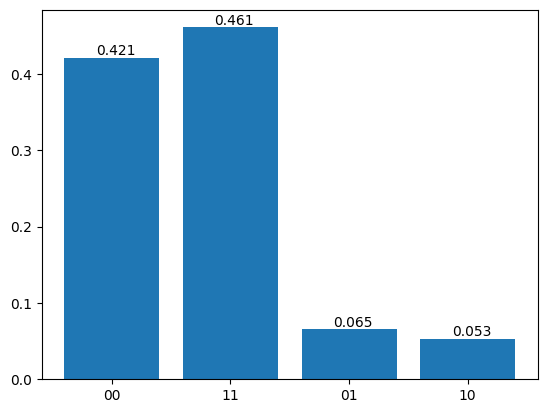

In [90]:
provider = IBMProvider()

selected_backend = "ibm_kyoto"
use_latest_job = True
nb_shots = 1024
job = None

if use_latest_job:
    print("Using latest job.")
    job = provider.retrieve_job("crjg5mp7fdh0008fdc9g")
    job_id = job.job_id()
else:
    print("Running new job.")
    backend = provider.get_backend(selected_backend)

    qc_basic = transpile(circuit, backend)
    job = backend.run(qc_basic, shots=nb_shots)
    job_id = job.job_id()
    
    while job.status() != JobStatus.DONE:
        pass

result = job.result()
counts = result.get_counts()

d_zero = counts["00"] / nb_shots
d_one = counts["11"] / nb_shots
zero_one = counts["01"] / nb_shots
one_zero = counts["10"] / nb_shots

bars = plt.bar(["00", "11", "01", "10"], [d_zero, d_one, zero_one, one_zero])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/3.0, yval, round(yval, 3), va='bottom')
